In [33]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("../../dataset/DM_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   hot                          25192 non-null  int64  
 9   num_failed_logins            25192 non-null  int64  
 10  logged_in                    25192 non-null  int64  
 11  num_compromised              25192 non-null  int64  
 12  root_shell                   25192 non-null  int64  
 13  su_attempted    

In [2]:
X, y = df.drop(columns=["class", "index_num"]), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17634 entries, 0 to 17633
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     17634 non-null  int64  
 1   protocol_type                17634 non-null  int64  
 2   service                      17634 non-null  int64  
 3   flag                         17634 non-null  int64  
 4   src_bytes                    17634 non-null  int64  
 5   dst_bytes                    17634 non-null  int64  
 6   land                         17634 non-null  int64  
 7   wrong_fragment               17634 non-null  int64  
 8   hot                          17634 non-null  int64  
 9   num_failed_logins            17634 non-null  int64  
 10  logged_in                    17634 non-null  int64  
 11  num_compromised              17634 non-null  int64  
 12  root_shell                   17634 non-null  int64  
 13  su_attempted    

In [3]:
print(f"Shape of X_train: {X_train.shape}\nShape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train: (17634, 38)
Shape of X_test: (7558, 38)
Shape of y_train: (17634,)
Shape of y_test: (7558,)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_vector = list()

for m_depth_iter in range(1, 21):
    clf_item = RandomForestClassifier(n_estimators=100, max_depth=m_depth_iter, random_state=0, criterion='entropy')
    clf_item.fit(X_train, y_train)
    clf_vector.append(clf_item)

plot_vector = []
for clf_item in clf_vector:
    clf_y_pred = clf_item.predict(X_test)

    accu = accuracy_score(y_test, clf_y_pred)
    print(f"depth: {clf_item.max_depth}  {accu}")
    plot_vector.append([clf_item.max_depth, accu])

depth: 1  0.9022228102672665
depth: 2  0.9511775602011114
depth: 3  0.9735379730087325
depth: 4  0.9785657581370732
depth: 5  0.9842550939401958
depth: 6  0.9899444297433183
depth: 7  0.9928552527123577
depth: 8  0.9943106641968775
depth: 9  0.9960306959513099
depth: 10  0.9966922466260916
depth: 11  0.997221487165917
depth: 12  0.9973537973008733
depth: 13  0.997221487165917
depth: 14  0.9970891770309606
depth: 15  0.997221487165917
depth: 16  0.9970891770309606
depth: 17  0.997221487165917
depth: 18  0.9969568668960043
depth: 19  0.9970891770309606
depth: 20  0.9969568668960043


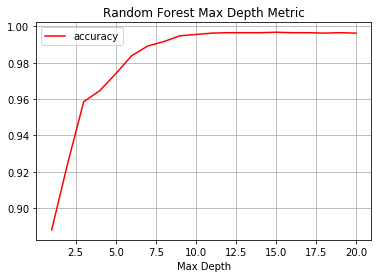

In [40]:
plot_vec = pd.DataFrame(plot_vector)
depth_x = plot_vec[:][0]
plt.xlabel('Max Depth')
plt.title('Random Forest Max Depth Metric')
plt.plot(depth_x, plot_vec[:][1], 'r', label='accuracy')
plt.grid(True)
plt.legend()
plt.savefig('./output/random forest max depth.png')
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
clf = clf_vector[14]
clf_y_pred = clf.predict(X_test)

conf_mat = confusion_matrix(y_test, clf_y_pred)
accuracy = (conf_mat[0][0]+conf_mat[1][1])/conf_mat.sum()
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
f1 = 2*(precision*recall)/(precision+recall)
error_rate = (conf_mat[0][1]+conf_mat[1][0])/conf_mat.sum()



print(f'accuracy:   {accuracy}')
print(f'precision:  {precision}')
print(f'racall:     {recall}')
print(f'f1 score:   {f1}')
print(f'error rate: {error_rate}')

accuracy:   0.997221487165917
precision:  0.9967964514539182
racall:     0.998026153466568
f1 score:   0.9974109234373073
error rate: 0.0027785128340830907


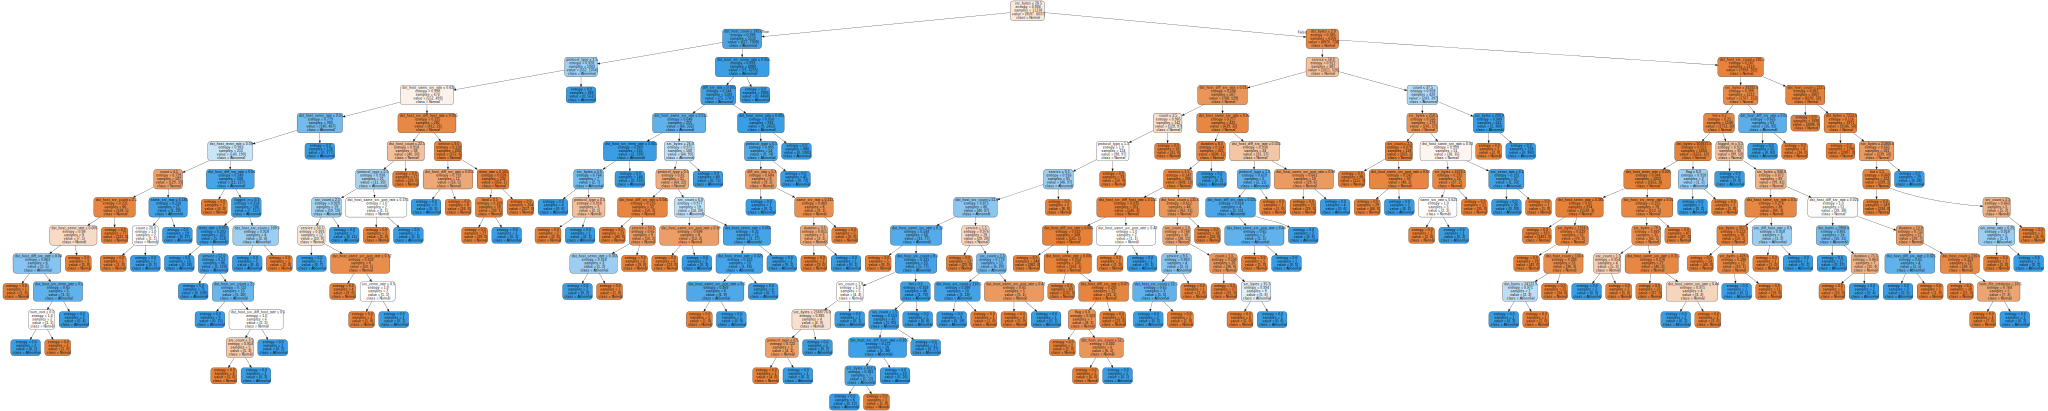

In [9]:
from IPython import display
from sklearn import tree
import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:\\Users\\s\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz' 
# 시각화
dot_data = tree.export_graphviz(clf.estimators_[5],
                               out_file = None,
                               feature_names = X_train.columns,
                               class_names = ["Normal", "Abnormal"],
                               filled = True,
                               rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('./output/random forest', format='jpg')
graph

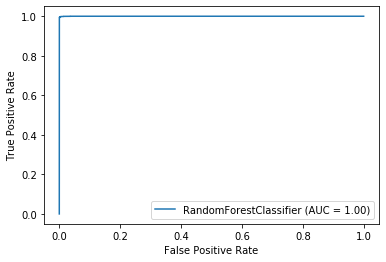

In [10]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)